# Trabalho da disciplina Projeto/MVP em Ciência de Dados

## Aluno: Luis Eduardo Ribeiro Veiga - RA: 40520223000855

## Notebook modelo Clássico

In [1]:
#-----

## Notebook modelo Deep Learning - Classificador de imagens do dataset CIFAR10

**Descrição do Problema** - Criar um modelo de visão computacional para classificar uma imagem em alguma das categorias presentes no dataset CIPHAR10.

**Dataset** - O dataset CIFAR-10 é composto por 60000 imagens a cores 32x32 em 10 classes, com 6000 imagens por classe. Existem 50000 imagens de treino e 10000 imagens de teste. 

As classes presentes no dataset são: airplane, automobile, bird, cat, deer, dog, frog, horse, ship e truck.

### Importação de bibliotecas

In [2]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import sklearn.metrics as skm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
gpu_dev_name = tf.test.gpu_device_name()
if gpu_dev_name != '/device:GPU:0':
  print('GPU não encontrada')
else:
    print('GPU encontrada em: {}'.format(gpu_dev_name))

GPU não encontrada


### Funções utilitárias

In [4]:
# Prepara dataframe com os dados lidos a partir do dataset CIFAR10 
def prepare_dataset(X_dataset, y_dataset, classes, n_samples):
    if n_samples is None:
        img_samples = X_dataset.shape[0]
    else:
        img_samples = n_samples

    df_aux = pd.DataFrame(columns=['id', 'label'])

    list_aux = []

    for i in range(img_samples):
        nm_file = str(i)+'-'+str([classes[x] for x in y_dataset[i]]).strip('[]').strip('\'')+'.'+'png'
        sample = {'id':nm_file, 'label':str([classes[x] for x in y_dataset[i]]).strip('[]').strip('\'')}
        list_aux.append(sample)

    return pd.concat([df_aux, pd.DataFrame(list_aux)], ignore_index=True)

# Cria arquivos nos diretórios de trabalho com as imagens contidas no dataset CIFAR10
def create_files(X_dataset, y_dataset, classes, dir, n_samples):
    if n_samples is None:
        img_samples = X_dataset.shape[0]
    else:
        img_samples = n_samples

    for i in range(img_samples):
        nm_file = str(i)+'-'+str([classes[x] for x in y_dataset[i]]).strip('[]').strip('\'')+'.'+'png'
        img = X_dataset[i]
        plt.imsave(dir + nm_file, img)

# Cria os diretórios de trabalho usados no processamento do código no notebook
def create_directory(dir):
    if os.path.exists(dir):
        # for file in os.listdir(dir):
        #     os.remove(dir+file)
        delete_files(dir)
    else:
        os.makedirs(dir)

# Exclui arquivos em diretório
def delete_files(dir):
    for file in os.listdir(dir):
        os.remove(dir+file)

# Plota gráfico com a evolução do valor loss em função da época
def plot_loss(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss X epoch')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Plota gráfico com a evolução do valor accuracy em função da época
def plot_accuracy(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('accuracy X epoch')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Plota matriz de confusão
def plot_confusion_matrix(actual, predicted, class_names):
    cnf_matrix = confusion_matrix(actual, predicted, labels=class_names)
    np.set_printoptions(precision=2)

    fig, ax = plt.subplots(figsize=(5, 5))
    cax = ax.matshow(cnf_matrix, cmap=plt.cm.Blues, alpha=0.3, interpolation = 'nearest')
    plt.gca().xaxis.tick_bottom()

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    for i in range(cnf_matrix.shape[0]):
        for j in range(cnf_matrix.shape[1]):
            ax.text(x=j, y=i,s=cnf_matrix[i, j], va='center', ha='center')

    fig.colorbar(cax)

    plt.xlabel('Predição', fontsize=13)
    plt.ylabel('Real', fontsize=13)
    plt.title('Matriz de Confusão', fontsize=18)
    plt.show()

# Define configuração do modelo 1
def model1(p_train_generator, p_test_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs):
    model1 = models.Sequential()

    model1.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model1.add(layers.Flatten())
    model1.add(layers.Dense(512, activation='relu'))
    model1.add(layers.Dense(10, activation='softmax'))
    
    model1.summary()

    history = compile_fit_model(model1, p_train_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs)

    loss, accuracy = display_result_model (model1, p_test_generator, history)

    return model1, loss, accuracy

# Define configuração do modelo 2
def model2(p_train_generator, p_test_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs):
    model2 = models.Sequential()

    model2.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model2.add(layers.Dropout(0.25))

    model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model2.add(layers.Dropout(0.25))

    model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model2.add(layers.Dropout(0.25))

    model2.add(layers.Flatten())
    model2.add(layers.Dense(512, activation='relu'))
    model2.add(layers.Dropout(0.25))
    model2.add(layers.Dense(10, activation='softmax'))
    
    model2.summary()
    
    history = compile_fit_model(model2, p_train_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs)

    loss, accuracy = display_result_model (model2, p_test_generator, history)

    return model2, loss, accuracy

# Define configuração do modelo 3
def model3(p_train_generator, p_test_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs):
    model3 = models.Sequential()

    model3.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model3.add(layers.Dropout(0.25))

    model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model3.add(layers.Dropout(0.25))

    model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model3.add(layers.Dropout(0.25))

    model3.add(layers.Flatten())
    model3.add(layers.Dense(512, activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.Dropout(0.25))
    model3.add(layers.Dense(10, activation='softmax'))
    
    model3.summary()
    
    history = compile_fit_model(model3, p_train_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs)

    loss, accuracy = display_result_model (model3, p_test_generator, history)

    return model3, loss, accuracy

# Define configuração do modelo 4
def model4(p_train_generator, p_test_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs):
    model4 = models.Sequential()

    model4.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model4.add(layers.BatchNormalization())
    model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model4.add(layers.BatchNormalization())
    model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model4.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model4.add(layers.BatchNormalization())
    model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model4.add(layers.Flatten())
    model4.add(layers.Dense(512, activation='relu'))
    model4.add(layers.BatchNormalization())
    model4.add(layers.Dense(10, activation='softmax'))
    
    model4.summary()
    
    history = compile_fit_model(model4, p_train_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs)

    loss, accuracy = display_result_model (model4, p_test_generator, history)

    return model4, loss, accuracy

# Processa a compilação e a função fit em um modelo
def compile_fit_model(p_model, p_train_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs):
    p_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = p_model.fit_generator(generator=p_train_generator,
          validation_data=p_valid_generator,
          steps_per_epoch=p_train_step_size,
          validation_steps=p_validation_step_size,
          epochs=p_epochs)
    
    return history

# Apresenta resultados do processamento de determinada operação no modelo
def display_result_model (p_model, p_test_generator, p_history):
    plot_loss(p_history)
    plot_accuracy(p_history)

    loss, accuracy = p_model.evaluate_generator(p_test_generator)
    print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

    return loss, accuracy

# Plota informações sobre um dataset
def plot_dataset_class(p_dataset, p_title):
    print((p_dataset['label']).value_counts())
    p_dataset['label'].value_counts().plot.bar(title=p_title)


### Carga e preparação dos dados

Carrega o dataset, separa entre treino e teste e monta a lista de classes das imagens.

In [5]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Cria os diretórios de trabalho.

In [6]:
train_dir = "./train/"
test_dir = "./test/" 

create_directory(train_dir)
create_directory(test_dir)

Define o tamanho das amostras de treino e teste usadas no processamento do notebook.

In [7]:
v_train_samples = 1000 
v_test_samples = 200 
# v_train_samples = X_train.shape[0]
# v_test_samples = X_test.shape[0]

Cria os arquivos de imagens de treinamento nos diretórios de trabalho e prepara o dataframe de treinamento usado no processamento do notebook.

In [8]:
train_samples = v_train_samples

create_files(X_train, y_train, cifar10_classes, train_dir, train_samples)

train_df = prepare_dataset(X_train, y_train, cifar10_classes, train_samples)

train_df.head()

,id,label
0,0-frog.png,frog
1,1-truck.png,truck
2,2-truck.png,truck
3,3-deer.png,deer
4,4-automobile.png,automobile


Cria os arquivos de imagens de teste nos diretórios de trabalho e prepara o dataframe de teste usado no processamento do notebook.

In [9]:
test_samples = v_test_samples

create_files(X_test, y_test, cifar10_classes, test_dir, test_samples)

test_df = prepare_dataset(X_test, y_test, cifar10_classes, test_samples)

test_df.head()

,id,label
0,0-cat.png,cat
1,1-ship.png,ship
2,2-ship.png,ship
3,3-airplane.png,airplane
4,4-frog.png,frog


Apresenta informações sobre os dados de treinamento.

label
automobile    112
frog          107
truck         103
horse         102
airplane      102
deer           99
bird           99
ship           99
cat            92
dog            85
Name: count, dtype: int64


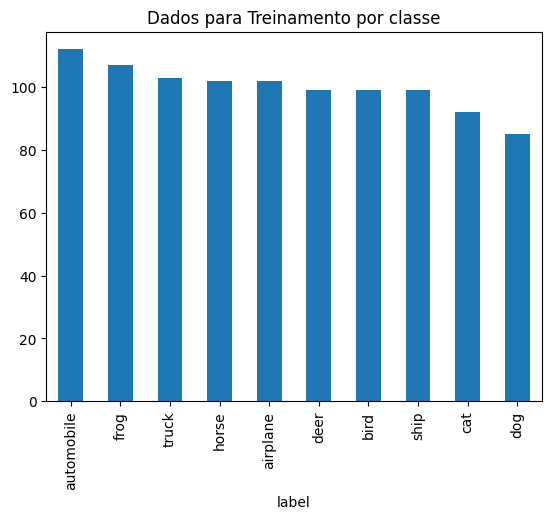

In [10]:
plot_dataset_class(train_df, 'Dados para Treinamento por classe')

Apresenta informações sobre os dados de teste.

label
ship          28
frog          26
truck         21
bird          21
airplane      20
cat           19
dog           18
horse         18
deer          15
automobile    14
Name: count, dtype: int64


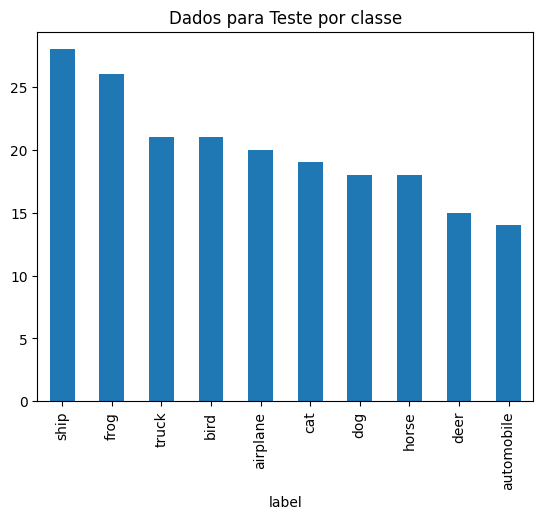

In [11]:
plot_dataset_class(test_df, 'Dados para Teste por classe')

Apresenta o total de imagens nos diretórios de treinamento e de teste.

In [12]:
print('Total de imagens para treinamento: %s' % len(os.listdir(train_dir)))
print('Total de imagens para teste      : %s' % len(os.listdir(test_dir)))

Total de imagens para treinamento: 1000
Total de imagens para teste      : 200


Apresenta algumas imagens do dataset de treinamento.

Classes: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


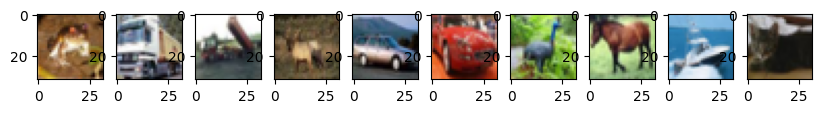

In [13]:
fig, x = plt.subplots(1, 10)
fig.set_size_inches(10, 10)

print('Classes: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

for i in range(10):
    image = X_train[i]
    x[i].imshow(image)

plt.show()

### Pré-processamento dos dados

Utilizamos a classe **keras.preprocessing.image.ImageDataGenerator** que permite configurar transformações e operações de normalização nas imagens durante o treinamento, assim como instânciar batches de imagens aumentadas. Essas operações reduzem o overfitting e generalizam melhor o modelo.

Configuramos o **ImageDataGenerator** para separar um conjunto de validação com 25% das amostras do conjunto de treino.

In [14]:
train_datagen=ImageDataGenerator(rescale=1.0/255.0,
                                validation_split=0.25,
                                rotation_range=30,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest'                                
                                )

train_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
directory=train_dir,
x_col="id",
y_col="label",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

valid_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
directory=train_dir,
x_col="id",
y_col="label",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

Found 750 validated image filenames belonging to 10 classes.
Found 250 validated image filenames belonging to 10 classes.


Configuração dos dados de teste.

In [15]:
test_datagen=ImageDataGenerator(rescale=1.0/255.0)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df,
directory=test_dir,
x_col="id",
y_col="label",
batch_size=32,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(32,32))

Found 200 validated image filenames belonging to 10 classes.


### Modelagem e treinamento

In [16]:
train_step_size = train_generator.n//train_generator.batch_size
validation_step_size = valid_generator.n//valid_generator.batch_size
step_size_test = test_generator.n//test_generator.batch_size

v_epochs = 30

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         1

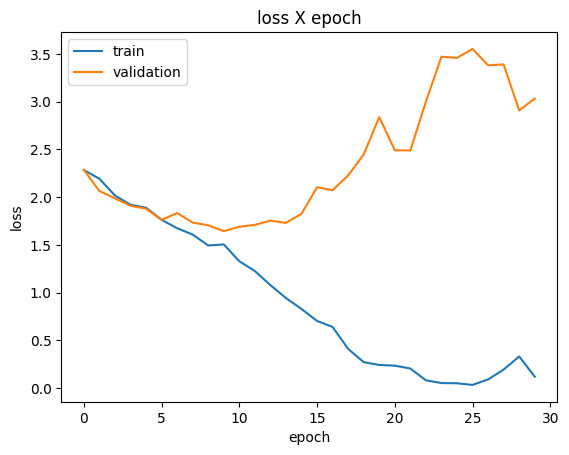

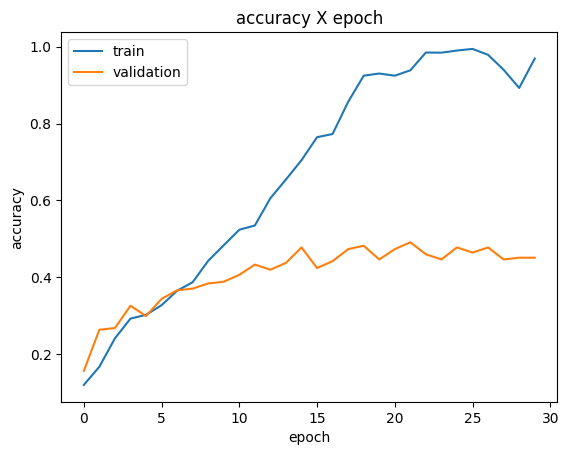

Test: accuracy = 0.420000  ;  loss = 3.251595 


In [17]:
model1, loss1, accuracy1 = model1(train_generator, test_generator, valid_generator, train_step_size, validation_step_size, v_epochs)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                  

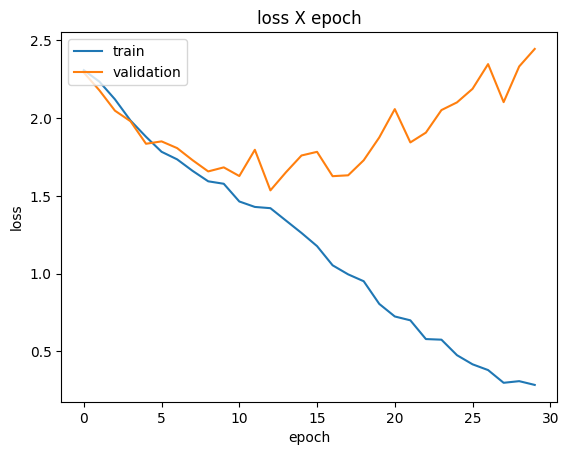

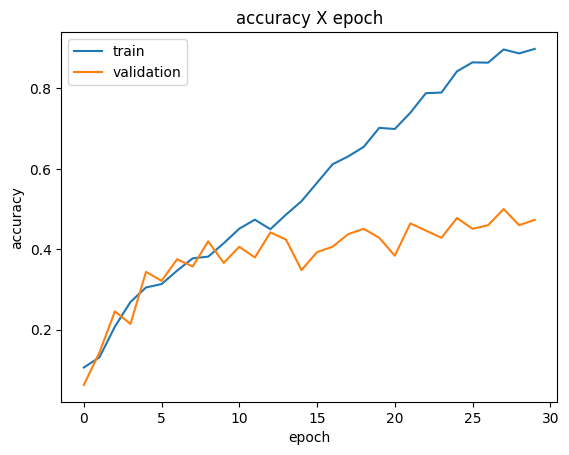

Test: accuracy = 0.400000  ;  loss = 2.744356 


In [18]:
model2, loss2, accuracy2 = model2(train_generator, test_generator, valid_generator, train_step_size, validation_step_size, v_epochs)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 128)      

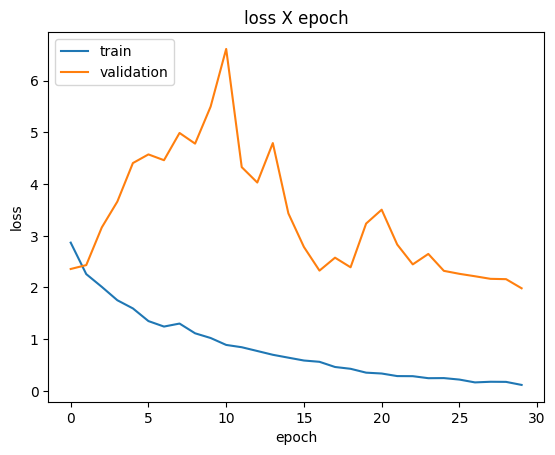

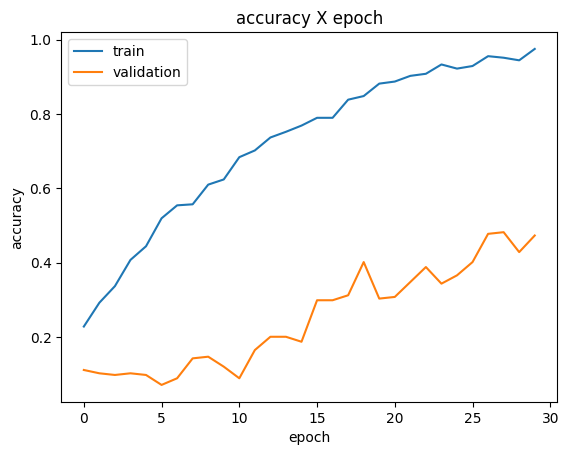

Test: accuracy = 0.350000  ;  loss = 2.435488 


In [19]:
model3, loss3, accuracy3 = model3(train_generator, test_generator, valid_generator, train_step_size, validation_step_size, v_epochs)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 batch_normalization_5 (Batc  (None, 12, 12, 128)     

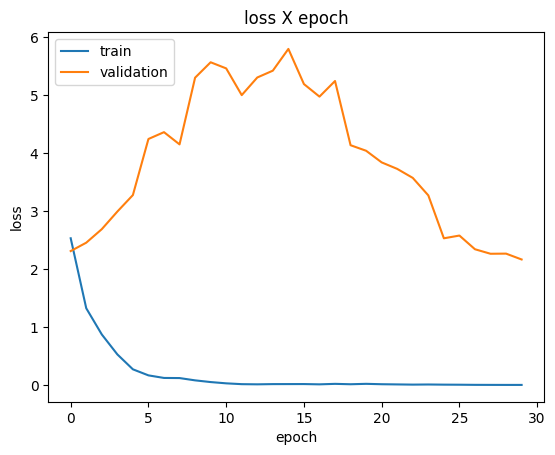

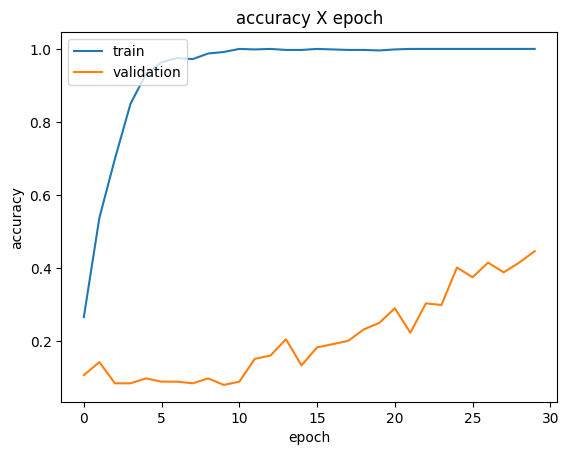

Test: accuracy = 0.445000  ;  loss = 2.369906 


In [20]:
model4, loss4, accuracy4 = model4(train_generator, test_generator, valid_generator, train_step_size, validation_step_size, v_epochs)

In [21]:
print('Resultado dos Modelos')
print('---------------------------')
table_result_model = [[accuracy1, loss1], [accuracy2, loss2], [accuracy3, loss3], [accuracy4, loss4]]
df_result_model = pd.DataFrame(table_result_model, columns = ['accuracy', 'loss'], index=['Model 1', 'Model 2', 'Model 3', 'Model 4'])
print(df_result_model)

Resultado dos Modelos
---------------------------
         accuracy      loss
Model 1     0.420  3.251595
Model 2     0.400  2.744356
Model 3     0.350  2.435488
Model 4     0.445  2.369906


In [22]:
model_accuracy = {
    'model1': accuracy1,
    'model2': accuracy2,
    'model3': accuracy3,
    'model4': accuracy4
}

model_selec = max(model_accuracy, key=model_accuracy.get)

print('Modelo escolhido: ' + model_selec)

if model_selec == 'model1':
    model = model1
elif model_selec == 'model2':
    model = model2
elif model_selec == 'model3':
    model = model3
else:
    model = model4

Modelo escolhido: model4


In [23]:
test_generator.reset()
pred=model.predict_generator(test_generator)

In [24]:
loss, accuracy = model.evaluate_generator(test_generator)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.445000  ;  loss = 2.369906 


In [25]:
predicted_class_indices=np.argmax(pred,axis=1)

In [26]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [27]:
test_generator.reset()

count = 0
actuals = list()

for batch in test_generator:
    count+=1
    if count == len(test_generator)+1:
        break
    else:
        images = batch[0]
        labels = batch[1]
        for i in range(len(images)):
            label = labels[i]
            labeled_class = np.argmax(label)
            label = cifar10_classes[int(labeled_class)]
            actuals.append(label)

accuracy = skm.accuracy_score(actuals, predictions)
precision = skm.precision_score(actuals, predictions, average='weighted')
recall = skm.recall_score(actuals, predictions, average='weighted')
f1score = skm.f1_score(actuals, predictions, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)

Accuracy:  0.445
Precision:  0.46494860723205433
Recall:  0.445
F1 Score:  0.44567288217946116


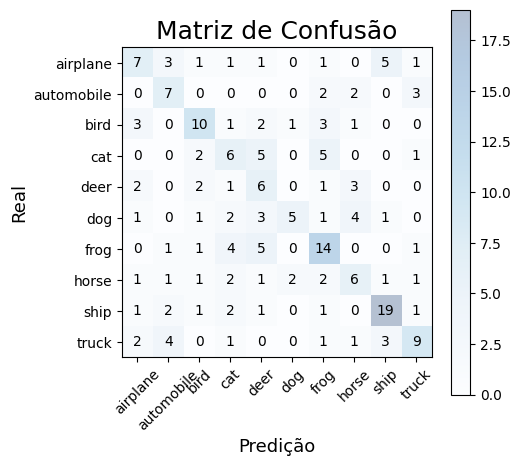

In [28]:
plot_confusion_matrix(actuals, predictions, cifar10_classes)

In [29]:
model_dir = "./trained_models/"
create_directory(model_dir)

model_name = 'trained_model_deep_learning.h5'

model.save("%s/%s" % (model_dir, model_name))
print("Modelo salvo com o nome: ", model_name)

Modelo salvo com o nome:  trained_model_deep_learning.h5


In [30]:
model_loaded = keras.models.load_model("%s/%s" % (model_dir, model_name))
print("Modelo %s carregado com sucesso" % (model_name))

Modelo trained_model_deep_learning.h5 carregado com sucesso


1/1 [==============================] - 0s 98ms/step


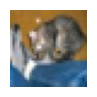

Label:  cat
Previsão:  frog
Probabilidade:  0.54335266


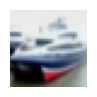

Label:  ship
Previsão:  automobile
Probabilidade:  0.5776512


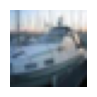

Label:  ship
Previsão:  ship
Probabilidade:  0.97015643


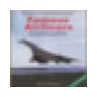

Label:  airplane
Previsão:  airplane
Probabilidade:  0.7642018


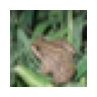

Label:  frog
Previsão:  deer
Probabilidade:  0.99060154


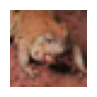

Label:  frog
Previsão:  cat
Probabilidade:  0.62392545


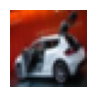

Label:  automobile
Previsão:  frog
Probabilidade:  0.27733812


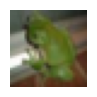

Label:  frog
Previsão:  deer
Probabilidade:  0.9999633


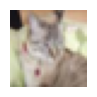

Label:  cat
Previsão:  bird
Probabilidade:  0.7812131


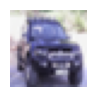

Label:  automobile
Previsão:  truck
Probabilidade:  0.98239166


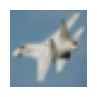

Label:  airplane
Previsão:  airplane
Probabilidade:  0.7769112


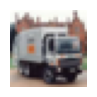

Label:  truck
Previsão:  truck
Probabilidade:  0.54893976


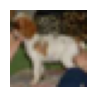

Label:  dog
Previsão:  dog
Probabilidade:  0.7893888


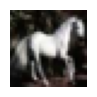

Label:  horse
Previsão:  horse
Probabilidade:  0.8729027


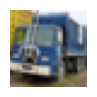

Label:  truck
Previsão:  truck
Probabilidade:  0.9102318


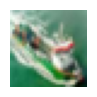

Label:  ship
Previsão:  frog
Probabilidade:  0.6672707


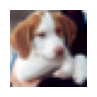

Label:  dog
Previsão:  ship
Probabilidade:  0.4931426


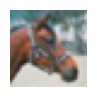

Label:  horse
Previsão:  cat
Probabilidade:  0.8560708


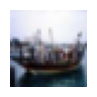

Label:  ship
Previsão:  ship
Probabilidade:  0.9393412


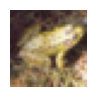

Label:  frog
Previsão:  frog
Probabilidade:  0.61916476


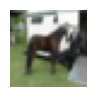

Label:  horse
Previsão:  truck
Probabilidade:  0.64653


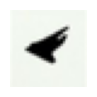

Label:  airplane
Previsão:  airplane
Probabilidade:  0.9998847


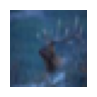

Label:  deer
Previsão:  airplane
Probabilidade:  0.41823807


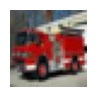

Label:  truck
Previsão:  horse
Probabilidade:  0.72840625


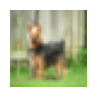

Label:  dog
Previsão:  bird
Probabilidade:  0.71638054


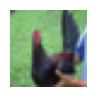

Label:  bird
Previsão:  bird
Probabilidade:  0.64779717


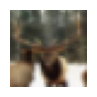

Label:  deer
Previsão:  deer
Probabilidade:  0.6570571


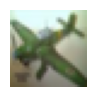

Label:  airplane
Previsão:  cat
Probabilidade:  0.3637799


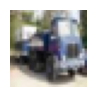

Label:  truck
Previsão:  truck
Probabilidade:  0.2888256


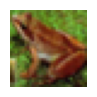

Label:  frog
Previsão:  frog
Probabilidade:  0.8984204


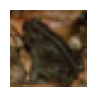

Label:  frog
Previsão:  cat
Probabilidade:  0.95280343


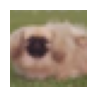

Label:  dog
Previsão:  deer
Probabilidade:  0.6794367
1/1 [==============================] - 0s 24ms/step


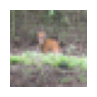

Label:  deer
Previsão:  deer
Probabilidade:  0.8949339


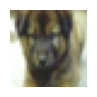

Label:  dog
Previsão:  cat
Probabilidade:  0.55962557


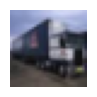

Label:  truck
Previsão:  cat
Probabilidade:  0.8148318


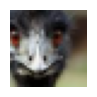

Label:  bird
Previsão:  bird
Probabilidade:  0.6103949


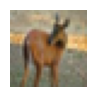

Label:  deer
Previsão:  deer
Probabilidade:  0.9844552


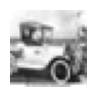

Label:  automobile
Previsão:  truck
Probabilidade:  0.9940202


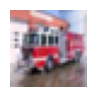

Label:  truck
Previsão:  truck
Probabilidade:  0.9780251


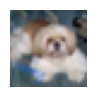

Label:  dog
Previsão:  dog
Probabilidade:  0.724765


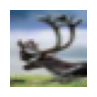

Label:  deer
Previsão:  airplane
Probabilidade:  0.99855393


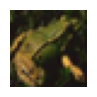

Label:  frog
Previsão:  bird
Probabilidade:  0.43651506


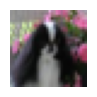

Label:  dog
Previsão:  dog
Probabilidade:  0.8160321


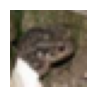

Label:  frog
Previsão:  frog
Probabilidade:  0.99935335


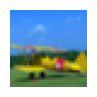

Label:  airplane
Previsão:  ship
Probabilidade:  0.4739159


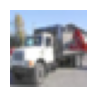

Label:  truck
Previsão:  truck
Probabilidade:  0.29718345


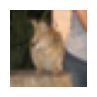

Label:  cat
Previsão:  cat
Probabilidade:  0.9788209


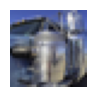

Label:  truck
Previsão:  airplane
Probabilidade:  0.33743238


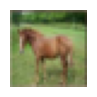

Label:  horse
Previsão:  deer
Probabilidade:  0.7169125


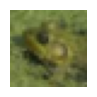

Label:  frog
Previsão:  frog
Probabilidade:  0.67104775


In [31]:
test_generator.reset()

count = 0
y_pred = list()
y_true = list()

img_count = 0
max_img = 50

# Loop do data generator de teste que contem as imagens
for batch in test_generator:
    count+=1

    # Condição de saída do loop. Só executaremos o modelo em algumas imagens
    if count == len(test_generator)+1 or img_count > max_img:
        break

    else:
        # Pegando a imagem e o label
        images = batch[0]
        labels = batch[1]

        # Previsão
        predictions = model_loaded.predict(images)

        # Visualização da imagem
        for i in range(len(images)):
            img_count+=1

            if img_count > max_img:
                break
            else:

                image = images[i]
                label = labels[i]

                prediction = predictions[i]

                # Converte o array de previsão para visualizar a classe e a probabilidade
                predicted_class = np.argmax(prediction)
                probability = prediction[predicted_class]

                labeled_class = np.argmax(label)
                label = cifar10_classes[int(labeled_class)]

                y_true.append(label)

                # Faz o DE-PARA da probabilidade com o tipo de classe da previsão
                # class_name = 'dog' if prediction >= 0.5 else 'cat'

                class_name = cifar10_classes[int(predicted_class)]

                y_pred.append(class_name)

                # Configura a saída das imagens que serão visualizadas
                
                fig, x = plt.subplots(1, 1)
                fig.set_size_inches(1, 1)

                plt.imshow(images[i])
                plt.axis('Off')
                plt.show()
                
                # Imprime os resultados da classificação das images
                print("Label: ", label)
                print("Previsão: ", class_name) 
                print("Probabilidade: ", probability) 